<a href="https://colab.research.google.com/github/andreadavi/ciencia_de_dados/blob/main/Introdu%C3%A7%C3%A3o_Ciencia_de_dados_Samsung_Ocean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# bibliotecas
import numpy as np # para fazer algebra linear , computacao cientifica
import pandas as pd # framework para analise de dados, biblioteca
import seaborn as sns # visualizacao dos dados, gráficos
import matplotlib.pyplot as plt # bibliotecas para visualização, gráficos

#Conhecendo o Dataset

In [ ]:
#pandas lê em vários tipos de arquivos, csv, excel, html, sql, query sql etc

df = pd.read_csv('train.csv', index_col='id')  #objeto dataframe guarda os dados de maneira organizada
# transformo o id no index gerado pelo panda index_col='nome da coluna sem dados repetidos'

In [ ]:
df.head() #mostra o que tem dentro do dataframe, das 5 primeiras linhas "head"
# df.head(10) mostra as 10 primeiras entradas
#geralmente queremos ver apenas alguns para entender os dados
# df.tail() #mostra os últimos 5

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,technician,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
1,36,management,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4,60,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [ ]:
df.info() #fornece algumas informações mais concentradas para humanos entenderem
# quantas colunas, qtos valores nao nulos tem, contagem de nao nulos de acordo com colunas
# object = dados de texto, int e float tbm são os tipos
# y é a variavel que tentarei prever no futuro
# o tamanho do arquivo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             36773 non-null  object 
 2   marital         37000 non-null  object 
 3   education       35505 non-null  object 
 4   default         29296 non-null  object 
 5   housing         36176 non-null  object 
 6   loan            36176 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  duration        37069 non-null  int64  
 11  campaign        37069 non-null  int64  
 12  pdays           37069 non-null  int64  
 13  previous        37069 non-null  int64  
 14  poutcome        37069 non-null  object 
 15  emp.var.rate    37069 non-null  float64
 16  cons.price.idx  37069 non-null  float64
 17  cons.conf.idx   37069 non-null 

In [ ]:
df.describe()
# consigo visualizar como variam as variaveis numericas (média, desvio padrao, mínimo, maximo)
# repito, não exibe variaveis não numericas!
# ex. menor idade, média da idade, maior idade, desvio padrao da idade
# 25%, 50%, 75% - primeiro quartil, mediana, 3/4 - quartis
# 999 não faz sentido para média, mas para saber que foi uma pessoa que nunca teve contato - é uma estratégia 
#           análise estatística       para ver por último essas pessoas

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.023497,258.185492,2.566862,962.058189,0.173946,0.082222,93.576416,-40.505555,3.620484,5166.966047
std,10.412653,259.579105,2.765626,187.939691,0.497441,1.571009,0.578585,4.623600,1.735310,72.360902
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.describe(include='object')
# consigo visualizar os valores não numéricos - descrição diferente dos numéricos
# tipos de dados diferentes precisam de análises de dados diferentes
# é preciso intimidade com os dados para saber o que é mais relevante
# / variaveis categóricas = tipo de variavel em que tenho categorias, são textos
# \ variáveis numéricas 
# unique = quantas categorias tenho para cada coluna
#     exemplo: se tem dívida - tenho apenas 2 categorias (sim ou não)
#              dias da semana - 5 diferentes, meses: 10 diferentes
#              y que é a categoria que estamos interessados (sim ou não)
# top = qual é a categoria mais frequente, o trabalho que aparece mais é o administrador (9364 pessoas)
#                                         o estado civil que mais aparece é casado (22424 pessoas)

# exemplo só há 3 pessoas com dívida no dataset

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,36773,37000,35505,29296,36176,36176,37069,37069,37069,37069,37069
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9364,22424,10967,29293,19432,30518,23515,12424,7735,31989,32893


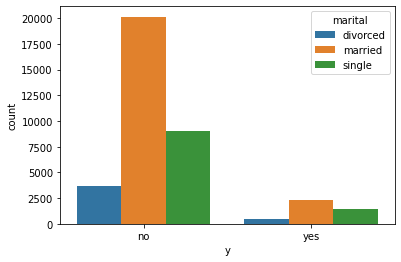

In [9]:
sns.countplot(data=df, x='y', hue='marital')

# Countplot - DADOS CATEGÓRICOS

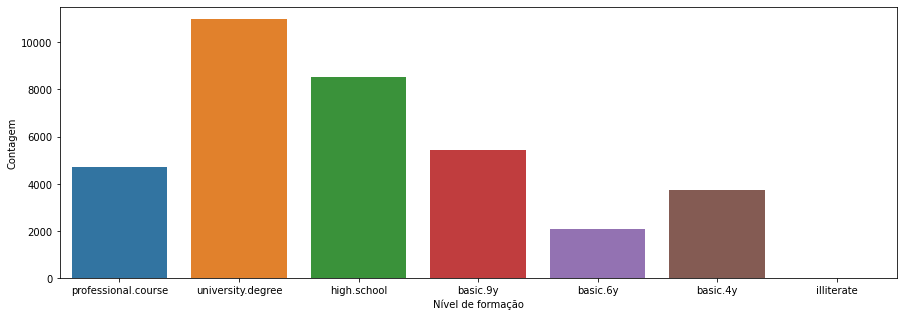

In [14]:
#COUNTPLOT É BOM PARA DADOS CATEGÓRICOS (NÃO NUMÉRICOS)
plt.figure(figsize=(15,5)) #dimensiona um tamanho maior, sem isso as informações ficam sobrepostas
sns.countplot(data=df, x='education') #seleciona no dataframe (objeto df) de acordo com a categoria educação
plt.ylabel('Contagem') #nome do eixo das ordenadas
plt.xlabel('Nível de formação') #nome do eixo das abs
plt.show() #exibe a figura

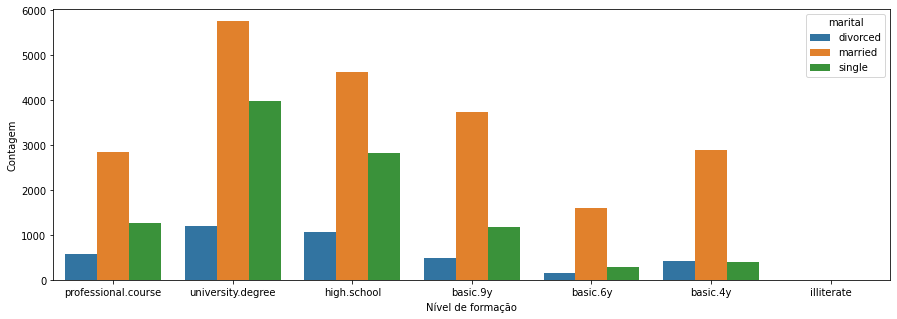

In [15]:
plt.figure(figsize=(15,5)) #dimensiona um tamanho maior, sem isso as informações ficam sobrepostas
sns.countplot(data=df, x='education', hue='marital') #seleciona no dataframe (objeto df) de acordo com a categoria educação
                        # mostra de acordo com o estato civil
plt.ylabel('Contagem') #nome do eixo das ordenadas
plt.xlabel('Nível de formação') #nome do eixo das abs
plt.show() #exibe a figura

In [19]:
help(sns.countplot)  #também posso pesquisar na propria pagina do seaborn (pesquisar seaborn.countplot)

Help on function countplot in module seaborn.categorical:

countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - An array or li

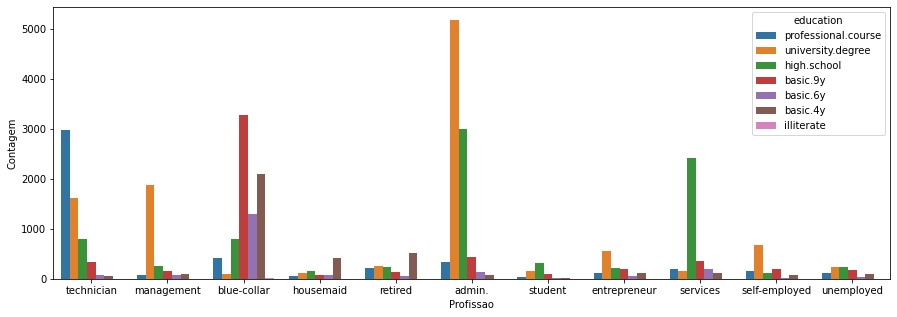

In [18]:
plt.figure(figsize=(15,5)) #dimensiona um tamanho maior, sem isso as informações ficam sobrepostas
sns.countplot(data=df, x='job', hue='education') #seleciona no dataframe (objeto df) de acordo com a profissao e separa em categoria da formação
plt.ylabel('Contagem') #nome do eixo das ordenadas
plt.xlabel('Profissao') #nome do eixo das abs
plt.show() #exibe a figura

In [ ]:
#palett seaborn mostra paletas de cores - pesquisar

# BARPLOT GRÁFICO DE BARRAS
## pesquisar seaborn.barplot

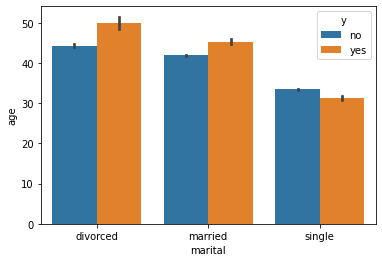

In [20]:
sns.barplot(data=df, x='marital', y='age', hue='y') #as barrinhas pretas verticais medem a variação/incerteza nesses dados
plt.show()                                          #barplot mostra a média de idade 

In [23]:
help(sns.catplot)

Help on function catplot in module seaborn.categorical:

catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7f8fa5b36a70>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
    Figure-level interface for drawing categorical plots onto a FacetGrid.
    
    This function provides access to several axes-level functions that
    show the relationship between a numerical and one or more categorical
    variables using one of several visual representations. The ``kind``
    parameter selects the underlying axes-level function to use:
    
    Categorical scatterplots:
    
    - :func:`stripplot` (with ``kind="strip"``; the default)
    - :func:`swarmplot` (with ``kind="swarm"``)
    
    Categorical dist

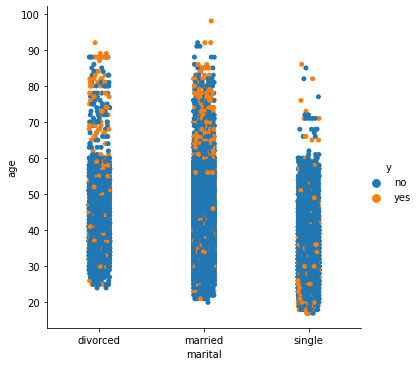

In [21]:
sns.catplot(data=df, x='marital', y='age', hue='y')
plt.show()


In [24]:
help(sns.scatterplot) # variáveis numéricas

Help on function scatterplot in module seaborn.relational:

scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)
    Draw a scatter plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can

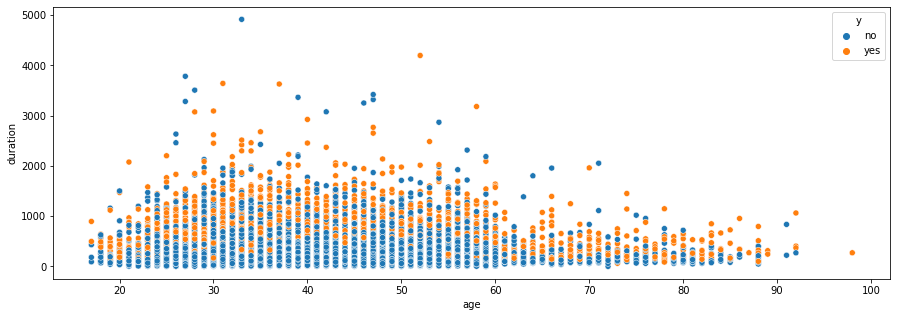

In [25]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='age', y='duration', data=df, hue='y')
plt.show()

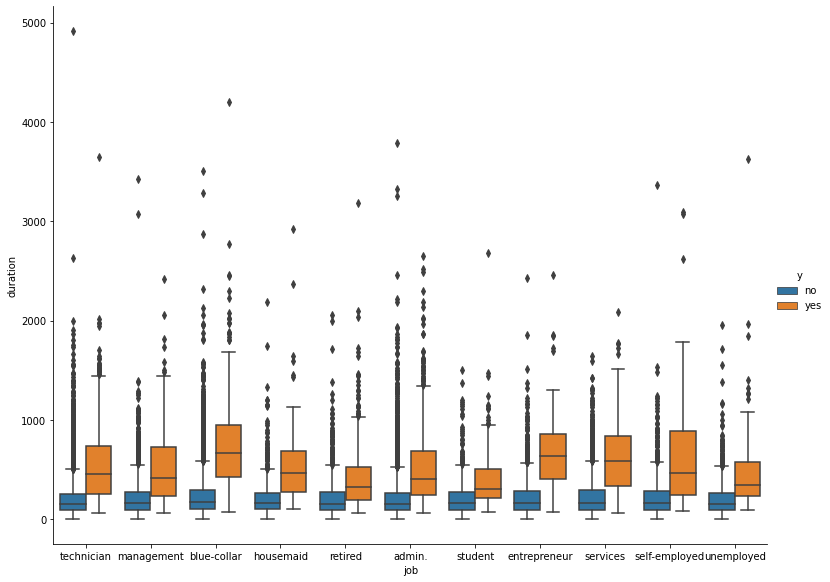

In [26]:
sns.figsize=(15, 5) 
sns.catplot(data=df, x='job', y='duration', hue='y', kind='box', aspect=8/6, height=8);
plt.show()

Entendi o dataset, agora é preciso modelar o banco de dados para que o computador entenda

# MODELANDO O DATASET

In [28]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn import metrics

In [31]:
# codificação One-hot
pd.get_dummies(df, columns=['job'])

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,52,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no,0,0,0,0,0,0,0,0,0,1,0
1,36,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,0,0,0,0,1,0,0,0,0,0,0
2,53,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0,1,0,0,0,0,0,0,0,0,0
3,45,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no,0,1,0,0,0,0,0,0,0,0,0
4,60,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37064,28,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,-1.7,94.215,-40.3,0.876,4991.6,no,0,0,0,0,0,0,0,1,0,0,0
37065,52,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no,0,0,0,0,0,0,0,0,0,1,0
37066,54,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,1,0,0,0,0,0,0,0,0,0,0
